In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
salaries_df = pd.read_csv('/content/salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M


In [ ]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18056 non-null  int64 
 1   experience_level    18056 non-null  object
 2   employment_type     18056 non-null  object
 3   job_title           18056 non-null  object
 4   salary              18056 non-null  int64 
 5   salary_currency     18056 non-null  object
 6   salary_in_usd       18056 non-null  int64 
 7   employee_residence  18056 non-null  object
 8   remote_ratio        18056 non-null  int64 
 9   company_location    18056 non-null  object
 10  company_size        18056 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [ ]:
salaries_df.shape

(18056, 11)

array([[<Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

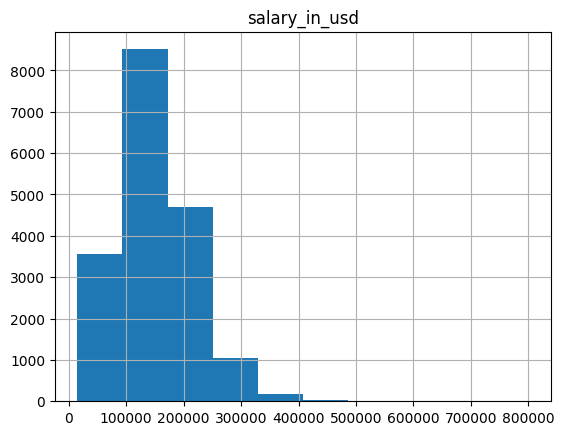

In [ ]:
salaries_df.hist('salary_in_usd')

In [ ]:
salaries_df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
salaries_df['log2_salary_in_usd'] = np.log2(salaries_df['salary_in_usd'])

array([[<Axes: title={'center': 'log2_salary_in_usd'}>]], dtype=object)

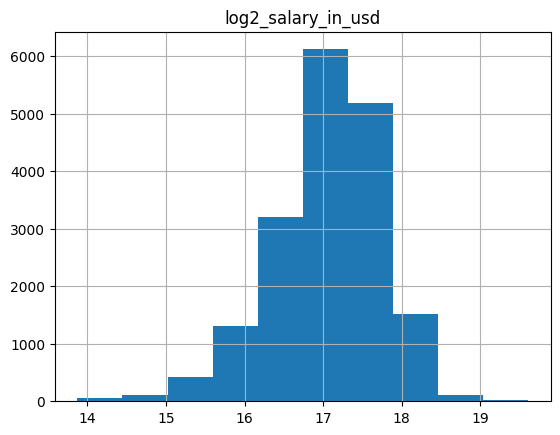

In [ ]:
salaries_df.hist('log2_salary_in_usd')

In [ ]:
salaries_df["job_title"].value_counts()

,count
job_title,
Data Scientist,4284
Data Engineer,3724
Data Analyst,2604
Machine Learning Engineer,2030
Research Scientist,715
...,...
Analytics Engineering Manager,1
Quantitative Research Analyst,1
Marketing Data Scientist,1


In [ ]:
salaries_df["work_year"].value_counts()

,count
work_year,
2023,8519
2024,7589
2022,1655
2021,218
2020,75


In [ ]:
salaries_df["experience_level"].value_counts()

,count
experience_level,
SE,11486
MI,4584
EN,1463
EX,523


In [ ]:
salaries_df["employment_type"].value_counts()

,count
employment_type,
FT,17974
PT,38
CT,30
FL,14


In [ ]:
salaries_df["salary_currency"].value_counts()

,count
salary_currency,
USD,16772
GBP,644
EUR,459
CAD,59
INR,56
AUD,12
PLN,8
CHF,8
SGD,6


In [ ]:
salaries_df["employee_residence"].value_counts()

,count
employee_residence,
US,15899
GB,714
CA,494
ES,141
DE,104
...,...
UG,1
MU,1
PE,1


In [ ]:
salaries_df["company_location"].value_counts()

,count
company_location,
US,15950
GB,722
CA,496
ES,137
DE,111
...,...
AM,1
QA,1
AD,1


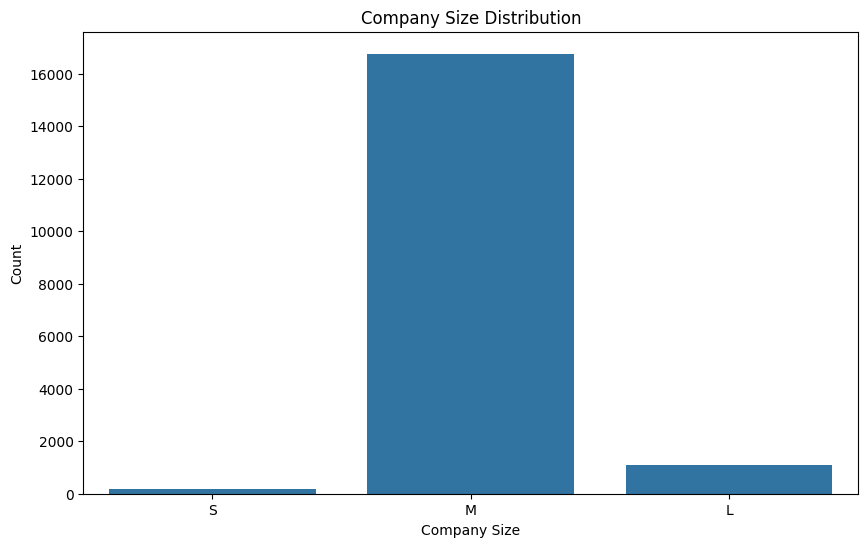

In [ ]:
import seaborn as sns

# Assuming salaries_df is your DataFrame and company_size is the column
plt.figure(figsize=(10,6))
sns.countplot(x='company_size', data=salaries_df)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

In [ ]:
salaries_df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'log2_salary_in_usd']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Apply Label Encoder on company_size column
salaries_df['company_size'] = le.fit_transform(salaries_df['company_size'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio,company_size,log2_salary_in_usd
count,18056.000000,1.805600e+04,18056.000000,18056.000000,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471,0.950210,17.049557
std,0.715810,3.265629e+05,68728.941915,45.828340,0.262514,0.695918
min,2020.000000,1.400000e+04,15000.000000,0.000000,0.000000,13.872675
25%,2023.000000,1.040000e+05,103500.000000,0.000000,1.000000,16.659271
50%,2023.000000,1.430000e+05,142200.000000,0.000000,1.000000,17.117562
75%,2024.000000,1.900000e+05,188500.000000,100.000000,1.000000,17.524205
max,2024.000000,3.040000e+07,800000.000000,100.000000,2.000000,19.609640


In [ ]:
# Select only numeric columns
numeric_salaries_df = salaries_df.select_dtypes(include=[np.number])

In [ ]:
# Compute pairwise correlation of columns
corr = numeric_salaries_df.corr()
corr["log2_salary_in_usd"]

,log2_salary_in_usd
work_year,0.105955
salary,0.093015
salary_in_usd,0.930710
remote_ratio,-0.061569
company_size,0.006793
log2_salary_in_usd,1.000000


In [ ]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           18056 non-null  int64  
 1   experience_level    18056 non-null  object 
 2   employment_type     18056 non-null  object 
 3   job_title           18056 non-null  object 
 4   salary              18056 non-null  int64  
 5   salary_currency     18056 non-null  object 
 6   salary_in_usd       18056 non-null  int64  
 7   employee_residence  18056 non-null  object 
 8   remote_ratio        18056 non-null  int64  
 9   company_location    18056 non-null  object 
 10  company_size        18056 non-null  int64  
 11  log2_salary_in_usd  18056 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 1.7+ MB


In [ ]:
salaries_df_obj = salaries_df.select_dtypes(include=['object'])
salaries_df_obj

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location
0,MI,FT,Analytics Engineer,CAD,CA,CA
1,SE,FT,AI Developer,USD,US,US
2,SE,FT,AI Developer,USD,US,US
3,MI,FT,Data Scientist,USD,US,US
4,MI,FT,Data Scientist,USD,US,US
...,...,...,...,...,...,...
18051,SE,FT,Data Scientist,USD,US,US
18052,MI,FT,Principal Data Scientist,USD,US,US
18053,EN,FT,Data Scientist,USD,US,US
18054,EN,CT,Business Data Analyst,USD,US,US


<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='experience_level'>

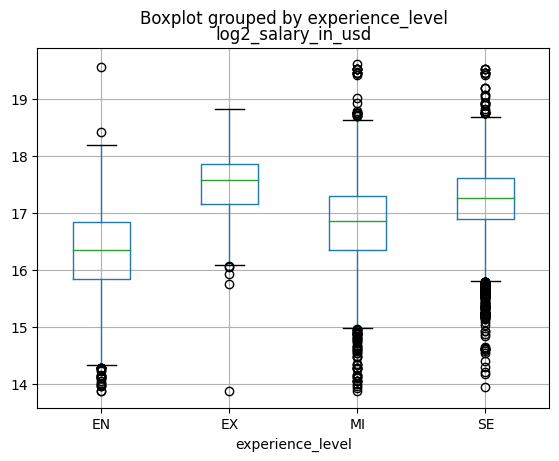

In [ ]:
salaries_df.boxplot("log2_salary_in_usd", by = "experience_level")

In [ ]:
predictor = ["work_year", "remote_ratio"]

In [ ]:
# Create a label encoder object
le = LabelEncoder()

# Apply Label Encoder on company_size column
salaries_df['experience_level'] = le.fit_transform(salaries_df['experience_level'])

In [ ]:
salaries_df['work_year'] = le.fit_transform(salaries_df['work_year'])
salaries_df['remote_ratio'] = le.fit_transform(salaries_df['remote_ratio'])

In [ ]:
salaries_df["work_year"].value_counts()

,count
work_year,
3,8519
4,7589
2,1655
1,218
0,75


In [ ]:
salaries_df["remote_ratio"].value_counts()

,count
remote_ratio,
0,12355
2,5452
1,249


In [ ]:
salaries_df["experience_level"].value_counts()

,count
experience_level,
3,11486
2,4584
0,1463
1,523


<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='employment_type'>

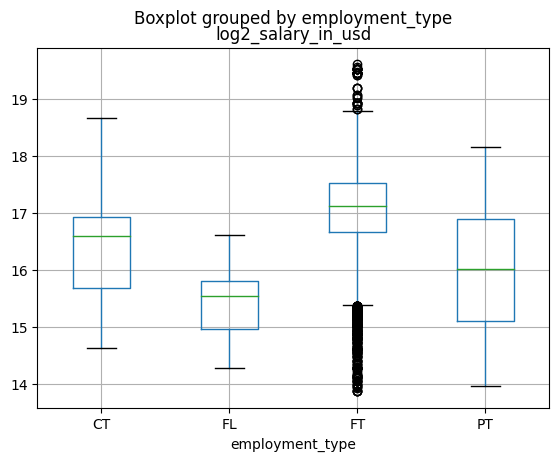

In [ ]:
salaries_df.boxplot("log2_salary_in_usd", by = "employment_type")

<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='job_title'>

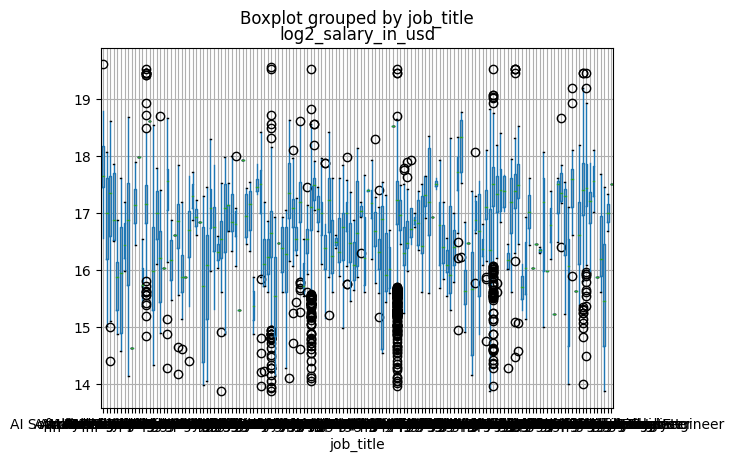

In [ ]:
salaries_df.boxplot("log2_salary_in_usd", by = "job_title")

<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='salary_currency'>

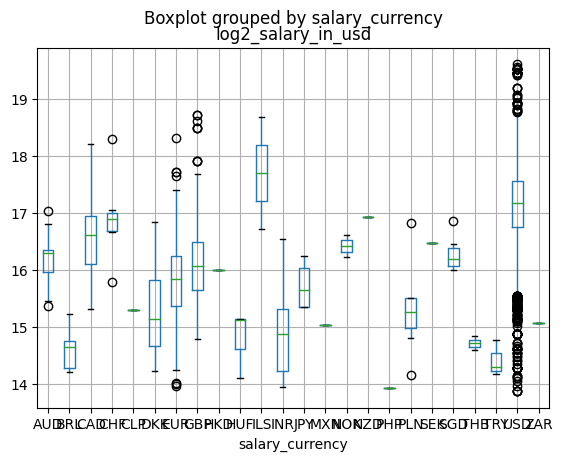

In [ ]:
salaries_df.boxplot("log2_salary_in_usd", by = "salary_currency")

In [ ]:
predictor.extend(["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "company_location"])

In [ ]:
predictor

['work_year',
 'remote_ratio',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location']

In [ ]:
X = salaries_df[predictor]

In [ ]:
X

,work_year,remote_ratio,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location
0,4,2,2,FT,Analytics Engineer,CAD,CA,CA
1,4,0,3,FT,AI Developer,USD,US,US
2,4,0,3,FT,AI Developer,USD,US,US
3,4,2,2,FT,Data Scientist,USD,US,US
4,4,2,2,FT,Data Scientist,USD,US,US
...,...,...,...,...,...,...,...,...
18051,0,2,3,FT,Data Scientist,USD,US,US
18052,1,2,2,FT,Principal Data Scientist,USD,US,US
18053,0,2,0,FT,Data Scientist,USD,US,US
18054,0,2,0,CT,Business Data Analyst,USD,US,US


In [ ]:
y = salaries_df["log2_salary_in_usd"]

In [ ]:
y

,log2_salary_in_usd
0,15.863388
1,17.943064
2,17.358102
3,17.606029
4,16.403744
...,...
18051,18.652285
18052,17.204189
18053,16.680030
18054,16.609640


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
salaries_lr = LinearRegression()

# **AI/ML Salaries**

Data Science job salaries from 2020 to 2023

About Dataset
The salaries are from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

The dataset contains one table structured as follow:

**work_year:**

The year the salary was paid.


**experience_level:**

The experience level in the job during the year with the following possiblevalues:
*    EN: Entry-level / Junior
*    MI: Mid-level / Intermediate
*    SE: Senior-level / Expert
*    EX: Executive-level / Director





**employment_type:**

The type of employement for the role:

*    PT: Part-time
*    FT: Full-time
*    CT: Contract
*    FL: Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely, possible values are as follows:

0: No remote work (less than 20%)

50: Partially remote

100: Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size: The average number of people that worked for the company during the year:

S: less than 50 employees (small)

M: 50 to 250 employees (medium)

L: more than 250 employees (large)
